In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../data/meteo_2021.csv')
df.head()

,nb,date,temp,wind,rain,Day of Week
0,8255,2021-04-09,10.68,4.25,0.11,Friday
1,16889,2021-04-10,10.12,3.52,0.00,Saturday
2,13475,2021-04-11,9.83,4.33,0.92,Sunday
3,9508,2021-04-12,7.28,4.47,0.27,Monday
4,13433,2021-04-13,6.45,2.21,0.01,Tuesday


In [3]:
X = df.iloc[:, [2, 3, 4]].values
y = df.iloc[:, 0].values

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
def choix_profondeur(X,y):
    l = list()
    for n in range(8):
        ab = DecisionTreeRegressor(max_depth=1+n)
        ab.fit(X,y)
        l.append(ab.score(X,y))
    return l
            

In [6]:
choix_profondeur(X,y)

[0.5391964140187371,
 0.6079434354547051,
 0.6837303450818153,
 0.759351188577761,
 0.8001553580682894,
 0.8351202636000348,
 0.8703112377003838,
 0.9145931687945951]

In [7]:
ab1 = DecisionTreeRegressor(max_depth=4)
ab1.fit(X,y)

DecisionTreeRegressor(max_depth=4)

In [8]:
ab1.score(X,y)

0.759351188577761

In [9]:
variables = ["temp","wind","rain"]

In [10]:
from sklearn import tree

In [11]:
text_representation = tree.export_text(ab1,feature_names=variables)
print(text_representation)

|--- temp <= 11.55
|   |--- temp <= 8.28
|   |   |--- rain <= 0.04
|   |   |   |--- temp <= 3.64
|   |   |   |   |--- value: [8014.50]
|   |   |   |--- temp >  3.64
|   |   |   |   |--- value: [17724.76]
|   |   |--- rain >  0.04
|   |   |   |--- temp <= 5.91
|   |   |   |   |--- value: [7043.33]
|   |   |   |--- temp >  5.91
|   |   |   |   |--- value: [11893.58]
|   |--- temp >  8.28
|   |   |--- wind <= 4.77
|   |   |   |--- wind <= 4.23
|   |   |   |   |--- value: [19328.44]
|   |   |   |--- wind >  4.23
|   |   |   |   |--- value: [9732.75]
|   |   |--- wind >  4.77
|   |   |   |--- temp <= 11.02
|   |   |   |   |--- value: [22227.62]
|   |   |   |--- temp >  11.02
|   |   |   |   |--- value: [11907.00]
|--- temp >  11.55
|   |--- rain <= 0.18
|   |   |--- temp <= 13.41
|   |   |   |--- temp <= 12.19
|   |   |   |   |--- value: [22795.60]
|   |   |   |--- temp >  12.19
|   |   |   |   |--- value: [25230.00]
|   |   |--- temp >  13.41
|   |   |   |--- wind <= 4.35
|   |   |   |   |

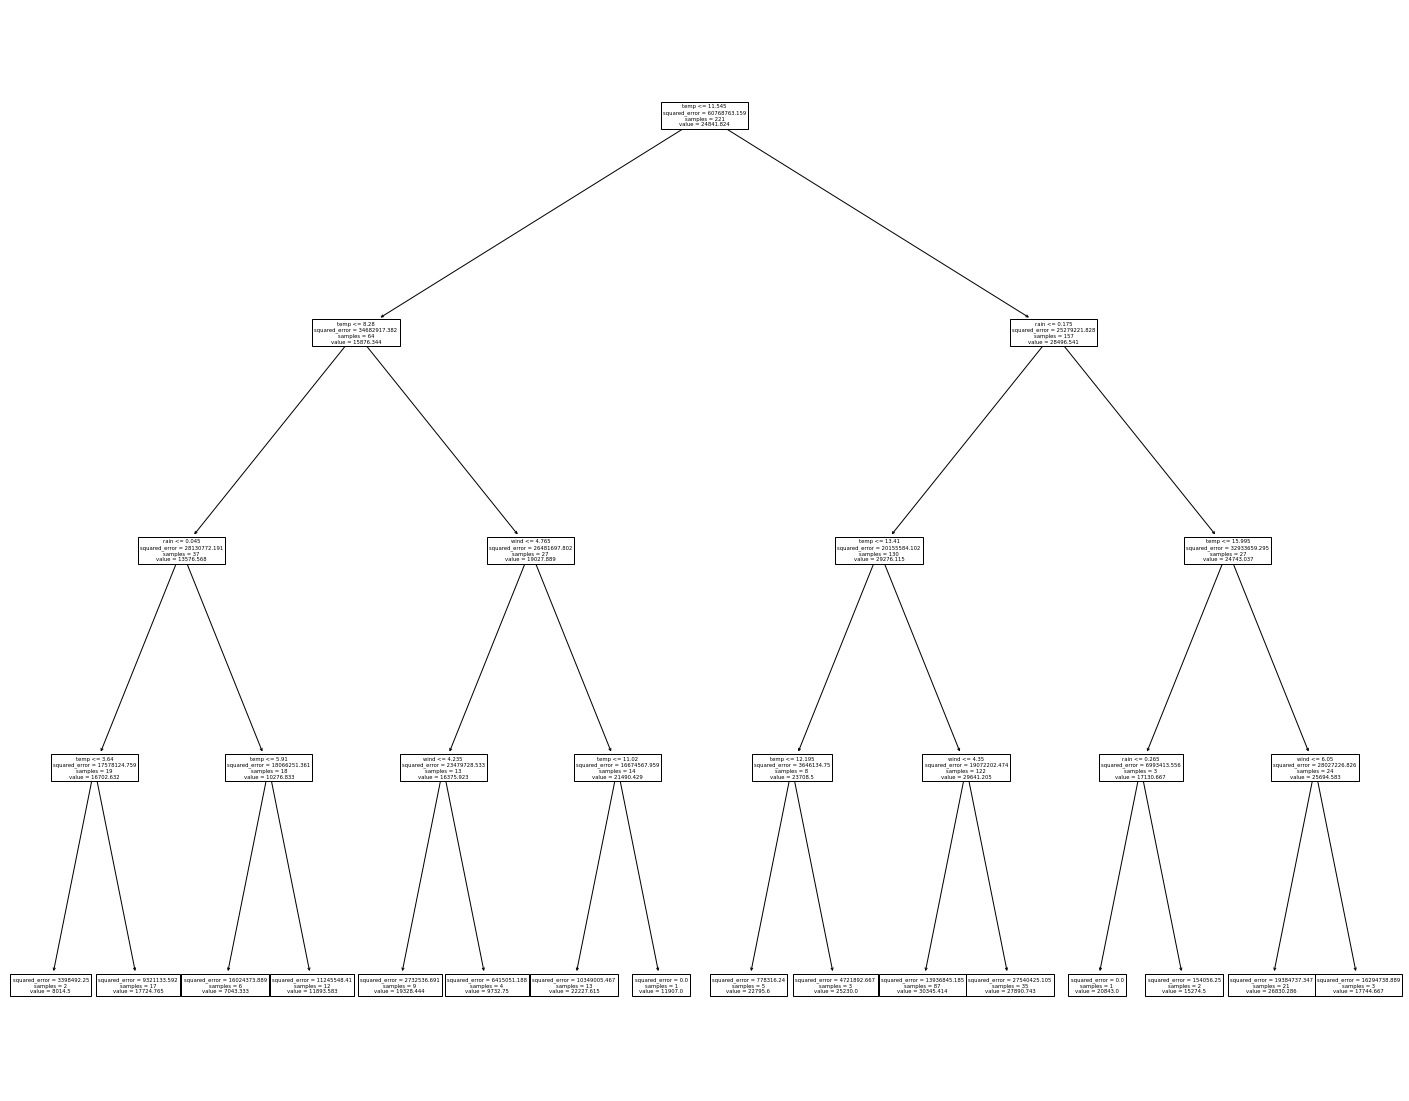

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ab1, feature_names=variables)

Ici bon score 